In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata

/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarn

In [2]:
adj_matrix = pd.read_csv('/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Results/Byst_SCENIC.adjacencies.csv', index_col=0)
motif_matrix = pd.read_csv('/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Results/Byst_SCENIC.motifs.csv', index_col=0)
auc_matrix = pd.read_csv('/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Results/Byst_SCENIC.auc.csv', index_col=0)

In [4]:
adata=scv.read("/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Data/Byst_cellrank.h5ad")
adata

AnnData object with n_obs × n_vars = 24129 × 7943
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'celltype_detail', 'celltype', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'UMAP1', 'UMAP2', 'palantir_pseudotime', 'palantir_entropy', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'clusters_gradients', 'fate_probabilities_Th2', 'fate_probabilities_Th1', 'fate_probabilities_Th1_MPEC', 'fate_probabilities_Rst'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'DM_EigenValues', 'T_fwd_params', 'batch_colors', 'celltype_colors', 'celltype_detail_colors', 'clusters_gradients_colors', 'coarse_fwd', 'diffmap_evals', 'eigendecomposition_fwd', 'hvg', 'init_states_fwd_colors', 'iroot', 'lineage_Th2-like_trend', 'log1p', 'macrostates_fwd_colors', 'neighbors', 'pa

In [5]:
adata.obs = adata.obs.join(auc_matrix, how='left')
print(adata.obs)

                               n_counts  n_genes  mt_counts   mt_frac  \
AAACCTGAGTGT-MTC           -1332.773682      941        2.0  0.001085   
AAACCTGCACCA-MTC            -195.471863     1774       29.0  0.005820   
AAACCTGCACGC-MTC            -805.665283     1231       72.0  0.025388   
AAACCTGCACGT-MTC           -1084.379639      996       42.0  0.023026   
AAACCTGCATAC-MTC            -536.225891     1308       22.0  0.008349   
...                                 ...      ...        ...       ...   
TTTGGTTAGCGT-IL7+IL25+IL33 -1438.311279     1045       80.0  0.030900   
TTTGGTTCAAAC-IL7+IL25+IL33   367.955811     2404      405.0  0.049724   
TTTGGTTTCATG-IL7+IL25+IL33   -57.326374     1933      262.0  0.044588   
TTTGTTGAGAGG-IL7+IL25+IL33  1693.156738     4659     1102.0  0.038833   
TTTGTTGGTGTT-IL7+IL25+IL33   671.401489     2342      229.0  0.033121   

                                    batch          sample_batch  \
AAACCTGAGTGT-MTC                     MPEC            ACG

In [7]:
import ast 
filtered_matrix = motif_matrix.iloc[:, [0, 8]]
filtered_matrix = filtered_matrix.iloc[2:].reset_index(drop=True)
filtered_matrix.columns = ['TF', 'TargetGenes']
filtered_matrix['TargetGenes'] = filtered_matrix['TargetGenes'].apply(
 lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
filtered_matrix['TargetGenes'] = filtered_matrix['TargetGenes'].apply(
 lambda x: [gene[0] for gene in x])
regulons = filtered_matrix.groupby('TF')['TargetGenes'].apply(lambda x: sum(x, [])).to_dict()

In [8]:
auc_data = adata.obs.loc[:, adata.obs.columns.str.endswith('(+)')]
clusters = adata.obs['celltype']
clustered_auc = auc_data.groupby(clusters).mean()

In [9]:
clustered_auc

,Ahdc1(+),Arid3a(+),Arid5b(+),Atf1(+),Atf2(+),Atf3(+),Atf4(+),Atf5(+),Atf7(+),Bach1(+),...,Zfp740(+),Zfp777(+),Zfp78(+),Zfp786(+),Zfp90(+),Zfp94(+),Zfp944(+),Zfx(+),Zic4(+),Zxdc(+)
celltype,,,,,,,,,,,,,,,,,,,,,
CCR6_high,0.064805,0.017427,0.058562,0.030664,0.039321,0.027811,0.032521,0.013129,0.036026,0.020088,...,0.040211,0.032735,0.047151,0.039032,0.011917,0.032091,0.078390,0.049868,0.005427,0.090475
IFN-I_high,0.070867,0.016452,0.057711,0.024127,0.035110,0.034909,0.029919,0.013479,0.023781,0.019420,...,0.038241,0.035006,0.045205,0.033182,0.010397,0.033775,0.076661,0.043532,0.000756,0.094378
PD-1_high,0.068878,0.018789,0.075275,0.029775,0.045291,0.029916,0.031866,0.021817,0.028396,0.019593,...,0.040030,0.036620,0.042169,0.023787,0.012839,0.033190,0.074452,0.047538,0.002846,0.090929
Resting,0.028888,0.018635,0.131901,0.032976,0.056345,0.036647,0.046746,0.087206,0.086095,0.024739,...,0.050309,0.029639,0.051756,0.015560,0.023204,0.020595,0.046551,0.071528,0.003464,0.063904
Th1-like,0.061495,0.016509,0.089299,0.031975,0.048415,0.033247,0.048253,0.084340,0.058743,0.024928,...,0.040307,0.030703,0.043085,0.014258,0.014958,0.020165,0.034188,0.064109,0.002609,0.061736
Th2-like,0.012970,0.017310,0.092244,0.028378,0.034702,0.049428,0.070792,0.117422,0.071310,0.017680,...,0.026196,0.013352,0.031624,0.008796,0.006330,0.007650,0.028678,0.051748,0.001258,0.040548
Treg-like,0.047261,0.018476,0.110070,0.029615,0.049501,0.036933,0.042901,0.066463,0.044881,0.024832,...,0.044631,0.030221,0.049730,0.015746,0.018963,0.033248,0.060315,0.057232,0.003342,0.075548
Undefined,0.016919,0.012201,0.086843,0.037174,0.034033,0.031720,0.058548,0.095295,0.084402,0.011395,...,0.025140,0.010679,0.041496,0.003782,0.005869,0.002160,0.023961,0.055528,0.000348,0.062227


In [10]:
cluster_name = "Th2-like"  # 1번 클러스터 이름 (정확한 이름을 사용)
cluster_auc = clustered_auc.loc[cluster_name]
top_20_tfs = cluster_auc.sort_values(ascending=False).head(20)
top_20_tfs.replace("(+)", "")
# 결과 출력
print(top_20_tfs)

Runx1(+)     0.325085
Tcf12(+)     0.274276
Mllt10(+)    0.158339
Chd2(+)      0.154521
Maff(+)      0.142839
Glis3(+)     0.141456
Zbtb2(+)     0.129458
Ikzf3(+)     0.127593
Maf(+)       0.127383
Ehf(+)       0.124745
Msx1(+)      0.118638
Atf5(+)      0.117422
Junb(+)      0.116076
Batf(+)      0.115009
Foxo3(+)     0.113128
Gata3(+)     0.111785
Mxd4(+)      0.105425
Rora(+)      0.104621
Irf1(+)      0.100351
Ets2(+)      0.099790
Name: Th2-like, dtype: float64


In [11]:
clusters = adata.obs['celltype']

# 새로운 열 'th2vs' 생성: 1번 클러스터는 유지, 나머지는 'other'로 설정
adata.obs['th2vs'] = clusters.apply(lambda x: x if x == 'Th2-like' else 'other')

# 결과 확인
print(adata.obs['th2vs'].value_counts())

th2vs
other       20078
Th2-like     4051
Name: count, dtype: int64


In [12]:
grouped_auc = auc_data.groupby(adata.obs['th2vs']).mean()
grouped_auc

,Ahdc1(+),Arid3a(+),Arid5b(+),Atf1(+),Atf2(+),Atf3(+),Atf4(+),Atf5(+),Atf7(+),Bach1(+),...,Zfp740(+),Zfp777(+),Zfp78(+),Zfp786(+),Zfp90(+),Zfp94(+),Zfp944(+),Zfx(+),Zic4(+),Zxdc(+)
th2vs,,,,,,,,,,,,,,,,,,,,,
Th2-like,0.012970,0.017310,0.092244,0.028378,0.034702,0.049428,0.070792,0.117422,0.071310,0.017680,...,0.026196,0.013352,0.031624,0.008796,0.006330,0.007650,0.028678,0.051748,0.001258,0.040548
other,0.035768,0.017971,0.119685,0.032735,0.053244,0.035630,0.046802,0.083653,0.077993,0.023997,...,0.046976,0.029186,0.049567,0.015466,0.020527,0.020642,0.045205,0.068201,0.003192,0.064949


In [13]:
from scipy.stats import ttest_ind

# 1번 클러스터와 other 그룹으로 데이터를 나누기
group_1 = auc_data[adata.obs['th2vs'] == 'Th2-like']
group_other = auc_data[adata.obs['th2vs'] == 'other']

# t-test 수행
p_values = {}
for tf in auc_data.columns:  # 각 TF에 대해 수행
    stat, p_val = ttest_ind(group_1[tf], group_other[tf], equal_var=False)
    p_values[tf] = p_val

# 결과를 정리하여 데이터프레임으로 변환
import pandas as pd
results = pd.DataFrame({
    'TF': p_values.keys(),
    'p-value': p_values.values()
}).set_index('TF')

# p-value로 정렬
results = results.sort_values('p-value')
print(results)

            p-value
TF                 
Nfkb2(+)   0.000000
Mxd4(+)    0.000000
Mtf1(+)    0.000000
Klf3(+)    0.000000
Klf13(+)   0.000000
...             ...
Zfp324(+)  0.264375
Trp73(+)   0.322930
Brca1(+)   0.430499
Barx2(+)   0.563543
Tead1(+)   0.625938

[314 rows x 1 columns]


In [14]:
from statsmodels.stats.multitest import multipletests
# 1. t-test로 p-value 계산
p_values = {}
z_scores = {}
for tf in auc_data.columns:
    # t-test
    stat, p_val = ttest_ind(group_1[tf], group_other[tf], equal_var=False)
    p_values[tf] = p_val
    
    # z-score
    mean_1, mean_other = group_1[tf].mean(), group_other[tf].mean()
    std_1, std_other = group_1[tf].std(), group_other[tf].std()
    z_scores[tf] = (mean_1 - mean_other) / np.sqrt((std_1**2 / len(group_1)) + (std_other**2 / len(group_other)))

In [15]:
# p-values와 z-scores를 데이터프레임으로 정리
results = pd.DataFrame({
    'TF': auc_data.columns,
    'p-value': [p_values[tf] for tf in auc_data.columns],
    'z-score': [z_scores[tf] for tf in auc_data.columns]
}).set_index('TF')

# 2. FDR 보정
reject, pvals_corrected, _, _ = multipletests(results['p-value'], method='fdr_bh')
results['adjusted p-value'] = pvals_corrected
results['significant'] = reject  # True/False

# 3. -log10(adjusted p-value) 계산
results['-log10(adj p-value)'] = -np.log10(results['adjusted p-value'])

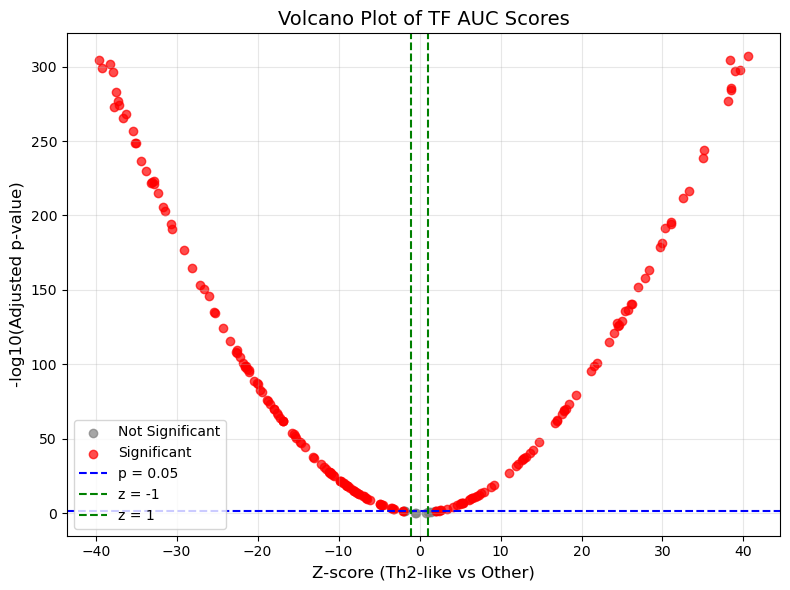

In [16]:
# 4. Volcano plot 시각화
plt.figure(figsize=(8, 6))

# 유의미한 TF 강조
significant = results[results['significant']]
not_significant = results[~results['significant']]

# 산점도 그리기
plt.scatter(not_significant['z-score'], not_significant['-log10(adj p-value)'], color='grey', alpha=0.7, label='Not Significant')
plt.scatter(significant['z-score'], significant['-log10(adj p-value)'], color='red', alpha=0.7, label='Significant')

# 가이드라인 추가 (예: z-score와 p-value 기준선)
plt.axhline(-np.log10(0.05), color='blue', linestyle='--', label='p = 0.05')
plt.axvline(-1, color='green', linestyle='--', label='z = -1')
plt.axvline(1, color='green', linestyle='--', label='z = 1')

# 축 레이블 및 제목
plt.xlabel('Z-score (Th2-like vs Other)', fontsize=12)
plt.ylabel('-log10(Adjusted p-value)', fontsize=12)
plt.title('Volcano Plot of TF AUC Scores', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Plot 표시
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


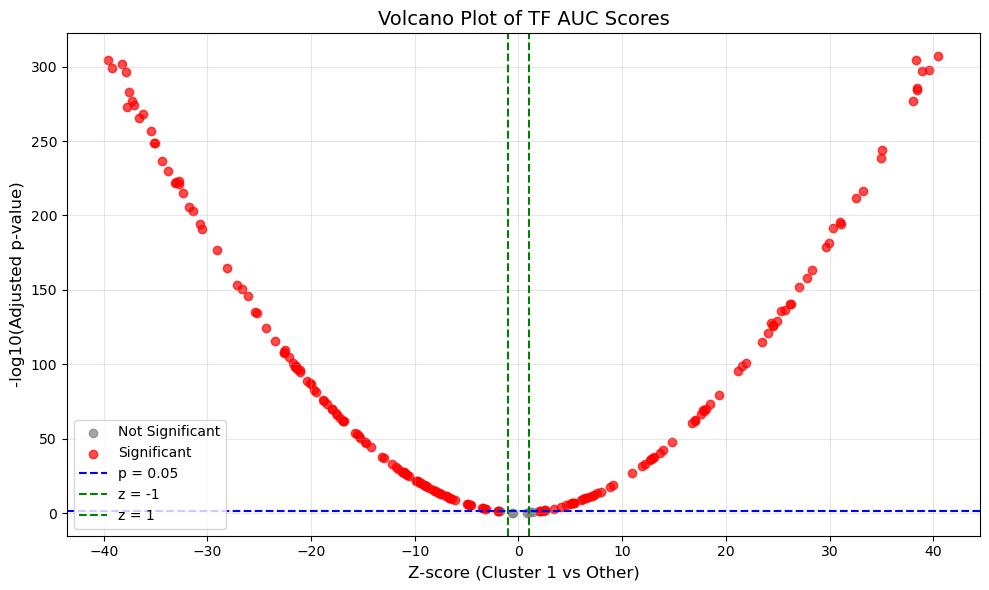

Top 6 TFs with highest z-scores:
           p-value     z-score  adjusted p-value  significant  \
TF                                                              
Batf(+)        0.0  156.876189               0.0         True   
Gata3(+)       0.0  145.878179               0.0         True   
Ikzf3(+)       0.0  127.208406               0.0         True   
Junb(+)        0.0  124.538016               0.0         True   
Atf4(+)        0.0  108.550193               0.0         True   
Gatad1(+)      0.0  106.045802               0.0         True   

           -log10(adj p-value)  
TF                              
Batf(+)                    inf  
Gata3(+)                   inf  
Ikzf3(+)                   inf  
Junb(+)                    inf  
Atf4(+)                    inf  
Gatad1(+)                  inf  

Top 6 TFs with lowest z-scores:
           p-value     z-score  adjusted p-value  significant  \
TF                                                              
Pou2f1(+)      0.0 

In [17]:
# Z-score 기준 상위 및 하위 6개 TF 선택
top_positive = results.nlargest(6, 'z-score')
top_negative = results.nsmallest(6, 'z-score')

# Volcano plot 생성
plt.figure(figsize=(10, 6))

# 유의미한 TF와 비유의미한 TF 분리
significant = results[results['significant']]
not_significant = results[~results['significant']]

# Volcano plot 그리기
plt.scatter(not_significant['z-score'], not_significant['-log10(adj p-value)'], color='grey', alpha=0.7, label='Not Significant')
plt.scatter(significant['z-score'], significant['-log10(adj p-value)'], color='red', alpha=0.7, label='Significant')

# z-score 기준 상위 및 하위 6개 TF 레이블 추가
for tf in top_positive.index:
    plt.text(
        top_positive.loc[tf, 'z-score'],
        top_positive.loc[tf, '-log10(adj p-value)'],
        tf,
        fontsize=8,
        color='blue'
    )

for tf in top_negative.index:
    plt.text(
        top_negative.loc[tf, 'z-score'],
        top_negative.loc[tf, '-log10(adj p-value)'],
        tf,
        fontsize=8,
        color='green'
    )

# 가이드라인 추가 (예: p-value 및 z-score 기준선)
plt.axhline(-np.log10(0.05), color='blue', linestyle='--', label='p = 0.05')
plt.axvline(-1, color='green', linestyle='--', label='z = -1')
plt.axvline(1, color='green', linestyle='--', label='z = 1')

# 축 레이블 및 제목
plt.xlabel('Z-score (Cluster 1 vs Other)', fontsize=12)
plt.ylabel('-log10(Adjusted p-value)', fontsize=12)
plt.title('Volcano Plot of TF AUC Scores', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Plot 표시
plt.show()

# 상위 및 하위 5개 TF 출력
print("Top 6 TFs with highest z-scores:")
print(top_positive)

print("\nTop 6 TFs with lowest z-scores:")
print(top_negative)

In [19]:
# TOP6 TF만 골라서 분석 진행

In [18]:
selected_tfs = ['Batf(+)', 'Gata3(+)', 'Ikzf3(+)','Junb(+)', 'Atf4(+)', 'Gatad1(+)']  
subset_auc = clustered_auc[selected_tfs]

Text(568.7500000000002, 0.5, 'Cluster')

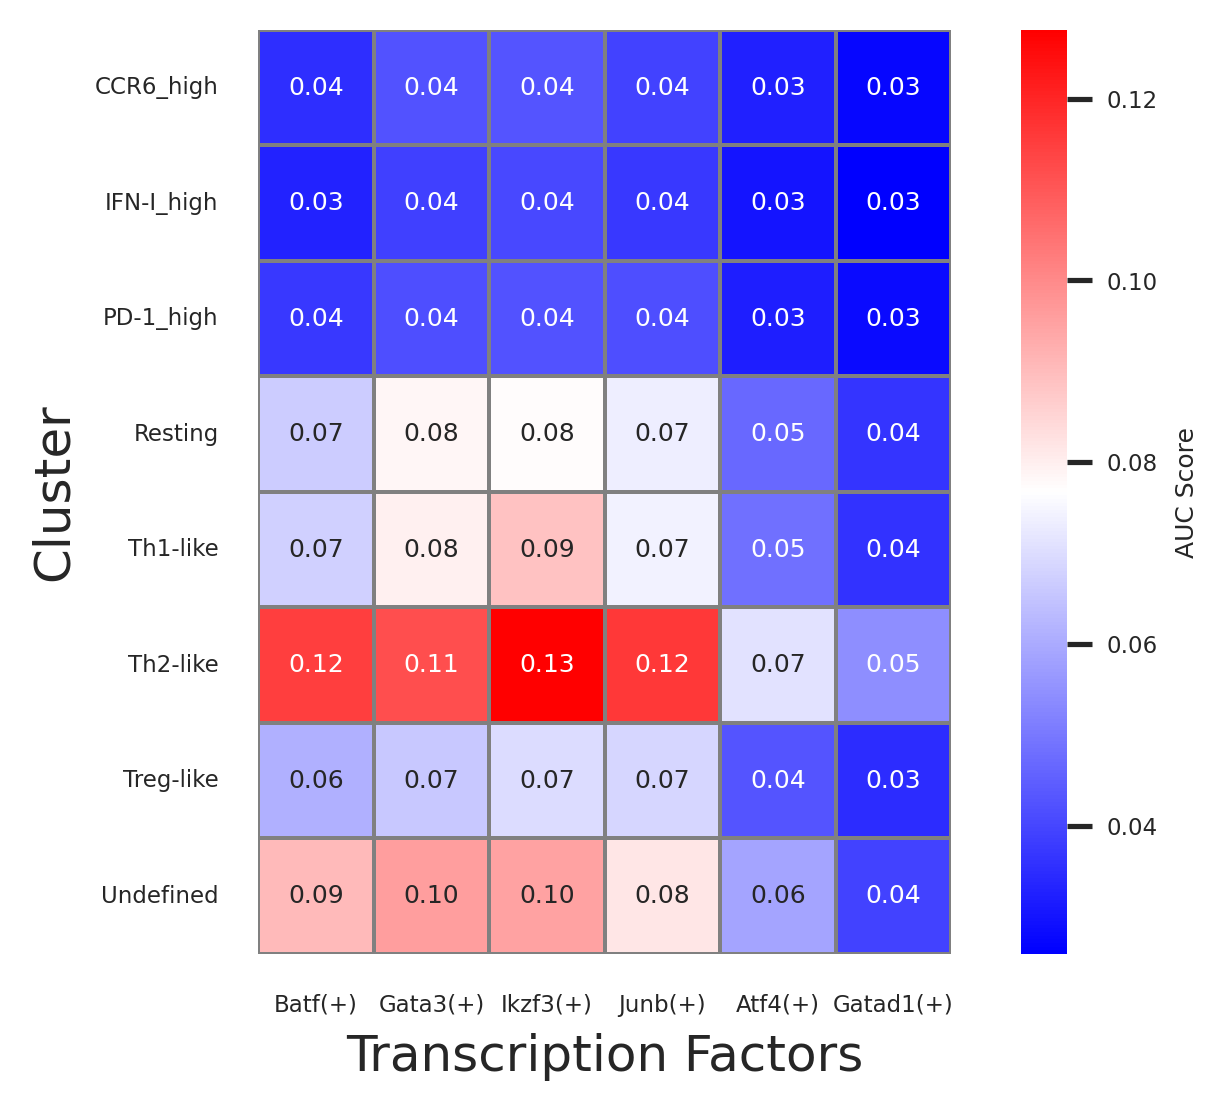

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Figure 사이즈 및 스타일 지정 (논문용)
plt.figure(figsize=(6, 4), dpi=300)  # 논문용 해상도와 크기
sns.set(font_scale=0.5)              # 글자 크기

# Heatmap
sns.heatmap(
    subset_auc, 
    cmap='bwr',   # 혹은 'coolwarm', 'magma', 'plasma' 등
    linewidths=0.5,   # 셀 간격
    linecolor='grey', # 셀 테두리 색
    annot=True,      # 값 표시 (원하면 True, 아니면 False)
    fmt=".2f",       # 소수점 두 자리
    cbar_kws={"label": "AUC Score"},  # 컬러바 라벨
    square=True      # 정사각형 셀
)

# 축 라벨 조정 (옵션)
plt.xlabel('Transcription Factors', fontsize=12)
plt.ylabel('Cluster', fontsize=12)

# TOP6 TF 에 대한 각 TF- regulon network 분석 

In [24]:
motif_matrix

,Unnamed: 0,Unnamed: 1,Enrichment,Enrichment.1,Enrichment.2,Enrichment.3,Enrichment.4,Enrichment.5,Enrichment.6,Enrichment.7
0,NaN,NaN,AUC,NES,MotifSimilarityQvalue,OrthologousIdentity,Annotation,Context,TargetGenes,RankAtMax
1,TF,MotifID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arid3a,tfdimers__MD00495,0.05052059291173001,3.183087302237559,1.6248e-07,0.803661,gene is orthologous to ENSG00000116017 in H. s...,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Wdfy4', 18.288056579700218), ('Mras', 0.330...",584
3,Arid3a,tfdimers__MD00370,0.05092065445966046,3.246919022909255,1.56199e-08,0.803661,gene is orthologous to ENSG00000116017 in H. s...,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Car8', 0.7144682486080651), ('Irf5', 2.6468...",1225
4,Arid3a,tfdimers__MD00394,0.049568309654476755,3.0311459842284374,9.03526e-14,0.803661,gene is orthologous to ENSG00000116017 in H. s...,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Cnn3', 0.4858427369124871), ('Ptgir', 0.740...",693
...,...,...,...,...,...,...,...,...,...,...
3025,Tfdp1,metacluster_15.3,0.09689771969715674,8.37252415111555,0.0,0.948781,gene is orthologous to ENSG00000198176 in H. s...,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Lrrc20', 12.331354765576464), ('Cdca7l', 3....",4984
3026,Tfdp1,metacluster_197.3,0.11709325546020936,10.774341202029875,0.0,1.0,gene is directly annotated,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Wdr77', 3.0745265434482545), ('Pclaf', 2.37...",4840
3027,Tfdp1,transfac_pro__M00803,0.07421215937055052,5.67457316624143,0.0,1.0,gene is directly annotated,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Pclaf', 2.372122575339421), ('Fbxo48', 1.18...",3356
3028,Yy1,tfdimers__MD00534,0.05240104866040028,3.588767309620517,3.62906e-07,0.987923,motif similar to tfdimers__MD00374 ('M01339_re...,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Ankrd34b', 0.2027493111127997), ('Traf3ip1'...",832


In [25]:
motif_matrix.iloc[0, 0] = "TF"
motif_matrix.iloc[0, 1] = "MotifID"
selected_tfs = ["Batf", "Gata3", "Junb", "Atf4", "Gatad1","Ikzf3"]
filtered_matrix = motif_matrix[motif_matrix['Unnamed: 0'].isin(selected_tfs)]
filtered_matrix

,Unnamed: 0,Unnamed: 1,Enrichment,Enrichment.1,Enrichment.2,Enrichment.3,Enrichment.4,Enrichment.5,Enrichment.6,Enrichment.7
5,Atf4,transfac_pro__M01861,0.038592606075314485,3.023293853914668,4.68974e-06,1.0,gene is annotated for similar motif transfac_p...,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Cuedc2', 0.4950036092258836), ('Pramef8', 0...",4402
6,Atf4,transfac_pro__M00801,0.04153057544257035,3.721591587765316,0.0,1.0,gene is directly annotated,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Sec31a', 0.5118307435857817), ('1700025G04R...",4998
115,Gata3,metacluster_138.2,0.04398806492472023,3.4489845244415887,1.49076e-08,0.96614,gene is orthologous to ENSG00000107485 in H. s...,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Psen2', 28.216253236993374), ('Fbxo30', 0.5...",4732
116,Gata3,metacluster_166.4,0.04527232603387263,3.7464427470364954,9.18469e-09,0.963964,motif similar to tfdimers__MD00562 ('M00025_fo...,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Katna1', 0.7753610447621916), ('Nr1h2', 0.5...",4290
117,Gata3,metacluster_35.2,0.04225504150289672,3.0475847910873703,4.61385e-10,0.963964,motif similar to tfdimers__MD00562 ('M00025_fo...,"frozenset({'activating', 'mm10_10kbp_up_10kbp_...","[('Nmt2', 1.557397051493393), ('Specc1', 18.98...",2909
...,...,...,...,...,...,...,...,...,...,...
2803,Atf4,taipale_tf_pairs__CEBPG_ATF4_NNATGAYGCAAT_CAP,0.051452288360019034,4.643090450148268,0.0,0.87106,gene is orthologous to ENSG00000128272 in H. s...,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Elmo3', 0.2192721839619273), ('Preb', 3.890...",4977
2804,Atf4,metacluster_156.2,0.05340627784518059,5.000445528469092,0.0,1.0,gene is directly annotated,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Yipf5', 2.2295612994193537), ('Ghitm', 1.43...",479
2902,Gata3,metacluster_166.4,0.04078492985295746,3.3154828123009734,9.18469e-09,0.963964,motif similar to tfdimers__MD00562 ('M00025_fo...,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Lipe', 2.3503495981143296), ('Uhrf1bp1l', 2...",4867
2906,Ikzf3,metacluster_167.5,0.042664358633373534,3.787067263476781,5.67732e-06,1.0,motif similar to jaspar__MA1992.1 ('Ikzf3'; q-...,frozenset({'mm10_500bp_up_100bp_down_full_tx_v...,"[('Mfsd1', 2.8410612039205434), ('Ctsa', 12.93...",1114


In [26]:
filtered_matrix_01 = filtered_matrix[filtered_matrix['Enrichment.5'].str.contains('top5perTarget', na=False)]
filtered_matrix_01

,Unnamed: 0,Unnamed: 1,Enrichment,Enrichment.1,Enrichment.2,Enrichment.3,Enrichment.4,Enrichment.5,Enrichment.6,Enrichment.7
1095,Atf4,taipale_tf_pairs__ATF4_CEBPB_NNATGAYGCAAYN_CAP,0.10807749868543462,5.219392709810083,0.0,0.87106,gene is orthologous to ENSG00000128272 in H. s...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Rhob', 13.668464209345553), ('Pim3', 12.510...",1138
1096,Atf4,taipale_tf_pairs__ATF4_CEBPD_NGATGATGCAATNN_CAP,0.16577680702180156,8.83155659677811,0.0,0.87106,gene is orthologous to ENSG00000128272 in H. s...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Pim3', 12.51060778878746), ('Sdc3', 15.8809...",307
1097,Atf4,taipale_tf_pairs__ATF4_TEF_RNMTGATGCAATN_CAP,0.1440763661367957,7.473038597928936,0.0,0.87106,gene is orthologous to ENSG00000128272 in H. s...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Rbakdn', 0.3133560272282031), ('Sdc3', 15.8...",450
1098,Atf4,taipale_tf_pairs__CEBPG_ATF4_NNATGAYGCAAT_CAP,0.10521579096387979,5.040240522636589,0.0,0.87106,gene is orthologous to ENSG00000128272 in H. s...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Aldh18a1', 18.73156865577148), ('Ddit3', 38...",530
1099,Atf4,metacluster_156.2,0.13490474456983376,6.8988653337368575,0.0,1.0,gene is directly annotated,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Enkur', 5.492060545812431), ('Slc7a5', 44.4...",491
1100,Batf,taipale_tf_pairs__JUN_ATGACGTCAT_HT,0.0571751553980696,3.1075883269390148,1.12108e-06,0.376,gene is orthologous to FBgn0028550 in D. melan...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Prr16', 1.6207398873001762), ('Pou2f2', 31....",2769
1117,Junb,transfac_pro__M04846,0.07499429002691135,3.8441249890555254,8.80413e-06,0.938953,gene is orthologous to ENSG00000171223 in H. s...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Pmepa1', 18.32783488161605), ('Ddit4', 22.0...",685
1118,Junb,jaspar__MA1633.2,0.07152858462180117,3.5438975060399613,1.66077e-07,0.938953,gene is orthologous to ENSG00000171223 in H. s...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('BB123696', 0.9242890977351196), ('Junb', 1....",217
1119,Junb,jaspar__MA1951.1,0.07225846813835017,3.6071259301134404,6.02968e-12,0.284884,gene is orthologous to FBgn0001291 in D. melan...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Fam71f2', 4.407441060909861), ('Hook2', 9.3...",391
1120,Junb,metacluster_180.3,0.07304296878879057,3.675085732859083,2.88558e-13,0.930836,motif similar to jaspar__MA1140.2 ('JUNB'; q-v...,"frozenset({'top5perTarget', 'mm10_10kbp_up_10k...","[('Tnfaip3', 84.38518509797537), ('Cass4', 14....",4322


In [27]:
top5_5_matrix = filtered_matrix_01.iloc[:, [0,3,4,8]]
top5_5_matrix.columns = ['TF','NES','Qvalue', 'TargetGenes']
top5_5_matrix

,TF,NES,Qvalue,TargetGenes
1095,Atf4,5.219392709810083,0.0,"[('Rhob', 13.668464209345553), ('Pim3', 12.510..."
1096,Atf4,8.83155659677811,0.0,"[('Pim3', 12.51060778878746), ('Sdc3', 15.8809..."
1097,Atf4,7.473038597928936,0.0,"[('Rbakdn', 0.3133560272282031), ('Sdc3', 15.8..."
1098,Atf4,5.040240522636589,0.0,"[('Aldh18a1', 18.73156865577148), ('Ddit3', 38..."
1099,Atf4,6.8988653337368575,0.0,"[('Enkur', 5.492060545812431), ('Slc7a5', 44.4..."
1100,Batf,3.1075883269390148,1.12108e-06,"[('Prr16', 1.6207398873001762), ('Pou2f2', 31...."
1117,Junb,3.8441249890555254,8.80413e-06,"[('Pmepa1', 18.32783488161605), ('Ddit4', 22.0..."
1118,Junb,3.5438975060399613,1.66077e-07,"[('BB123696', 0.9242890977351196), ('Junb', 1...."
1119,Junb,3.6071259301134404,6.02968e-12,"[('Fam71f2', 4.407441060909861), ('Hook2', 9.3..."
1120,Junb,3.675085732859083,2.88558e-13,"[('Tnfaip3', 84.38518509797537), ('Cass4', 14...."


In [28]:
top5_5_matrix['TargetGenes'] = top5_5_matrix['TargetGenes'].astype(str).apply(eval)
top5_5_matrix_ex = top5_5_matrix.explode('TargetGenes')

top5_5_matrix_ex[['TargetGenes', 'importance']] = top5_5_matrix_ex['TargetGenes'].apply(
    lambda x: pd.Series({'TargetGenes': x[0], 'importance': x[1]})
)

In [29]:
top5_5_matrix_ex.to_csv('/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Results/Top5_top6gene_th2.motifs.csv')